# Imports

In [1]:

import Orange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

### Pegando os resultados de cada base de dados

In [2]:

result_abalone = pd.read_csv('resultados/abalone.csv', index_col=0)
result_balance = pd.read_csv('resultados/balance.csv', index_col=0)
result_cogumelos = pd.read_csv('resultados/cogumelos.csv', index_col=0)
result_ecoli = pd.read_csv('resultados/ecoli.csv', index_col=0)
result_folhas = pd.read_csv('resultados/folhas.csv', index_col=0)
result_habermans = pd.read_csv('resultados/habermans.csv', index_col=0)
result_inflammations = pd.read_csv('resultados/inflammations.csv', index_col=0)

result_jogodavelha = pd.read_csv('resultados/jogodavelha.csv', index_col=0)
result_sementes = pd.read_csv('resultados/sementes.csv', index_col=0)
result_tae = pd.read_csv('resultados/tae.csv', index_col=0)



### Filtro de Dados

In [10]:
import inspect

main_result = None

def rename_index(df, index_name):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    l = [k for k, v in callers_local_vars if v is df]
    new_index_name = l[0]
    obj = df.rename(index={index_name: new_index_name})
    return obj


def filter_datasets(filter_index):
    abalone = result_abalone.filter(like=filter_index, axis=0)
    balance = result_balance.filter(like=filter_index, axis=0)
    cogumelos = result_cogumelos.filter(like=filter_index, axis=0)
    ecoli = result_ecoli.filter(like=filter_index, axis=0)
    folhas = result_folhas.filter(like=filter_index, axis=0)
    habermans = result_habermans.filter(like=filter_index, axis=0)
    inflammations = result_inflammations.filter(like=filter_index, axis=0)
    jogodavelha = result_jogodavelha.filter(like=filter_index, axis=0)
    sementes = result_sementes.filter(like=filter_index, axis=0)
    tae = result_tae.filter(like=filter_index, axis=0)
    
    main_result = rename_index(abalone, filter_index)
    main_result = main_result.append(rename_index(balance, filter_index))
    main_result = main_result.append(rename_index(cogumelos, filter_index))
    main_result = main_result.append(rename_index(ecoli, filter_index))
    main_result = main_result.append(rename_index(folhas, filter_index))
    main_result = main_result.append(rename_index(habermans, filter_index))
    main_result = main_result.append(rename_index(inflammations, filter_index))
    main_result = main_result.append(rename_index(jogodavelha, filter_index))
    main_result = main_result.append(rename_index(sementes, filter_index))
    main_result = main_result.append(rename_index(tae, filter_index))
    
    main_result.index.names = ['Datasets']
    return main_result


##### Filtrando apenas os scores principais

In [11]:
_temp = filter_datasets("main_score")
_temp

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Datasets,,,,,
abalone,0.251196,0.297448,0.284689,0.098884,0.200159
balance,0.867021,0.893617,0.845745,0.888298,0.787234
cogumelos,1.000000,1.000000,1.000000,0.955701,1.000000
ecoli,0.841584,0.900990,0.871287,0.732673,0.831683
folhas,0.735294,0.725490,0.460784,0.696078,0.568627
habermans,0.728261,0.663043,0.739130,0.728261,0.652174
inflammations,1.000000,1.000000,1.000000,1.000000,1.000000
jogodavelha,0.954861,0.989583,0.982639,0.659722,0.944444
sementes,0.857143,0.888889,0.825397,0.873016,0.904762


In [12]:
media_temp = []
for col in _temp.columns:
    media_temp.append(np.mean(_temp[col]))
pd.DataFrame([media_temp], index=['Média'], columns=_temp.columns.values)

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Média,0.793101,0.790254,0.757489,0.702394,0.754126


##### Filtrando apenas o Precision

In [13]:
_temp = filter_datasets("Precision") 
_temp

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Datasets,,,,,
abalone,0.149938,0.145505,0.154050,0.072966,0.131050
balance,0.580854,0.595510,0.574324,0.592995,0.571365
cogumelos,1.000000,1.000000,1.000000,0.957996,1.000000
ecoli,0.643422,0.783465,0.763690,0.436569,0.722998
folhas,0.710920,0.735057,0.439770,0.733415,0.498889
habermans,0.649784,0.424370,0.678049,0.649784,0.553247
inflammations,1.000000,1.000000,1.000000,1.000000,1.000000
jogodavelha,0.964636,0.992347,0.987374,0.622639,0.935284
sementes,0.865424,0.888889,0.825696,0.877778,0.908333


In [14]:
media_temp = []
for col in _temp.columns:
    media_temp.append(np.mean(_temp[col]))
pd.DataFrame([media_temp], index=['Média'], columns=_temp.columns.values)

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Média,0.728574,0.720443,0.702785,0.621235,0.703228


##### Filtrando apenas o Recall

In [15]:
_temp = filter_datasets("Recall") 
_temp

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Datasets,,,,,
abalone,0.137211,0.145096,0.155985,0.124316,0.129731
balance,0.639815,0.659259,0.625926,0.655556,0.581944
cogumelos,1.000000,1.000000,1.000000,0.957015,1.000000
ecoli,0.598187,0.780444,0.735639,0.515217,0.687463
folhas,0.745525,0.713629,0.514943,0.750369,0.529762
habermans,0.600816,0.473776,0.585082,0.600816,0.547786
inflammations,1.000000,1.000000,1.000000,1.000000,1.000000
jogodavelha,0.934251,0.984211,0.973684,0.628525,0.939842
sementes,0.857648,0.888672,0.822006,0.871284,0.903102


In [16]:
media_temp = []
for col in _temp.columns:
    media_temp.append(np.mean(_temp[col]))
pd.DataFrame([media_temp], index=['Média'], columns=_temp.columns.values)

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Média,0.721286,0.719866,0.698172,0.649893,0.698035


##### Filtrando apenas os dados do F-measure | F1 que serão usados na análise

In [17]:
main_result = filter_datasets("F1")
main_result    

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Datasets,,,,,
abalone,0.130989,0.135584,0.147190,0.067150,0.126596
balance,0.608632,0.625402,0.593197,0.621712,0.573811
cogumelos,1.000000,1.000000,1.000000,0.955695,1.000000
ecoli,0.613788,0.781740,0.740725,0.468510,0.701591
folhas,0.709551,0.695863,0.425103,0.707515,0.489909
habermans,0.607709,0.427654,0.585586,0.607709,0.549020
inflammations,1.000000,1.000000,1.000000,1.000000,1.000000
jogodavelha,0.947314,0.988123,0.980093,0.624681,0.937500
sementes,0.859302,0.888457,0.821198,0.873188,0.904348


In [18]:
media_temp = []
for col in main_result.columns:
    media_temp.append(np.mean(main_result[col]))
pd.DataFrame([media_temp], index=['Média'], columns=main_result.columns.values)

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Média,0.717647,0.708708,0.686248,0.624336,0.693652


##### Calculando a os rankings de cada base de dados

In [19]:
from scipy.stats import rankdata

# função para rankear cada linha de 1 a 5, empates são considerados valores iguais
def ranking(row):
    
    r_len = len(row.values[0])
    
    u, v = np.unique(row, return_inverse=True)
    temp_r = (np.cumsum(np.bincount(v)))[v]
    rank = []
    
    for e in temp_r:
        rank.append((r_len - e) + 1)

    return [rank]

i_bases = len(main_result.values)

ranked_result = main_result.copy()

for i in range(i_bases):
    row = ranked_result.iloc[[i]]
    temp = row.replace(row.values, ranking(row))
    ranked_result.iloc[[i]] = temp

ranked_result

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Datasets,,,,,
abalone,3.0,2.0,1.0,5.0,4.0
balance,3.0,1.0,4.0,2.0,5.0
cogumelos,1.0,1.0,1.0,5.0,1.0
ecoli,4.0,1.0,2.0,5.0,3.0
folhas,1.0,3.0,5.0,2.0,4.0
habermans,1.0,5.0,3.0,1.0,4.0
inflammations,1.0,1.0,1.0,1.0,1.0
jogodavelha,3.0,1.0,2.0,5.0,4.0
sementes,4.0,2.0,5.0,3.0,1.0


In [20]:
# main_result.describe()

##### Calculando a média dos rankings 

In [21]:
media = []
for col in ranked_result.columns:
    media.append(np.mean(ranked_result[col]))
pd.DataFrame([media], index=['Média'], columns=ranked_result.columns.values)

,knn_scores,svc_scores,mlp_scores,gnb_scores,arvore_scores
Média,2.2,2.1,2.7,3.4,2.9


##### Pegando os valores de cada algoritmo para gerar o P-value pelo teste de Friedman

In [22]:
knn_scores = main_result["knn_scores"].values
svc_scores = main_result["svc_scores"].values
mlp_scores = main_result["mlp_scores"].values
gnb_scores = main_result["gnb_scores"].values
arvore_scores = main_result["arvore_scores"].values


stat, p_value = friedmanchisquare(knn_scores, svc_scores, mlp_scores, gnb_scores, arvore_scores)
p_value

0.34289843502187345

##### NEMENYI E DIAGRAMA CD

In [23]:
names = main_result.columns.values

avranks = media # RANKS MEDIOS

cd = Orange.evaluation.scoring.compute_CD(avranks=avranks, n=10, alpha='0.05', test='nemenyi')
cd

1.9288274929443536

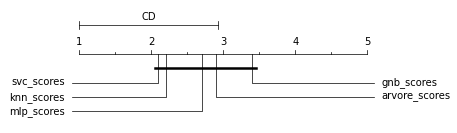

In [24]:
Orange.evaluation.scoring.graph_ranks(avranks=avranks, names=names, cd=cd, filename="nemenyi-test")